# Feature Engineering

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.


### High-level steps covered:

- Find hidden information
  - feature extraction
  - applying statistical functions
  - apply physics functions
- Deal with too much data
  - dimensionality reduction
  - feature selection
- Statistical Inference 


### Resources

- [Basic Feature Engineering With Time Series Data in Python](http://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/)
- [Zillow Prize - EDA, Data Cleaning & Feature Engineering](https://www.kaggle.com/lauracozma/eda-data-cleaning-feature-engineering)
- [Feature-wise transformations](https://distill.pub/2018/feature-wise-transformations)
- [tsfresh - tsfresh is used to to extract characteristics from time series](https://tsfresh.readthedocs.io/en/latest/text/introduction.html)
- [featuretools - an open source python framework for automated feature engineering](https://github.com/featuretools/featuretools/)
- [Synthetic features and outliers notebook](https://colab.research.google.com/notebooks/mlcc/synthetic_features_and_outliers.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=syntheticfeatures-colab&hl=en#scrollTo=jnKgkN5fHbGy)


Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

#### Load Your Data

In [52]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
names = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
data = pandas.read_csv(url, names=names)

!rm  housing.names || true
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names
print("Names and descriptions of the fields of the Boston Housing dataset can be found at")
print("https://github.com/jbrownlee/Datasets/blob/master/housing.names")
print("")
!cat housing.names

--2019-04-19 23:05:16--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2080 (2.0K) [text/plain]
Saving to: ‘housing.names’

housing.names       100%[===================>]   2.03K  --.-KB/s    in 0s      

2019-04-19 23:05:16 (11.6 MB/s) - ‘housing.names’ saved [2080/2080]

Names and descriptions of the fields of the Boston Housing dataset can be found at
https://github.com/jbrownlee/Datasets/blob/master/housing.names

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics 

let's set a baseline to evaluate our attempts to improve our model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def evaluateModelOnDataset(data):
    X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'medv'].values, data["medv"].values, test_size=0.33, random_state=42)
    # train_test_split(%%!)
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)
evaluateModelOnDataset(data)

0.7261570836552489

### Find hidden information

- feature extraction
- applying statistical functions
- apply physics functions 

#### Feature extraction

- group together sparse classes
- create new calculated columns, for e.g. extracting weekday from date
- generate relevant labels with the help of results from clustering



####  Applying statistical functions
- convert to absolute values
- apply root mean square
- use logarithmic functions
- applying rolling mean / stddev / min / max 

And manage precision of the data!


We observed earlier than there was a correlation between lstat and medv.

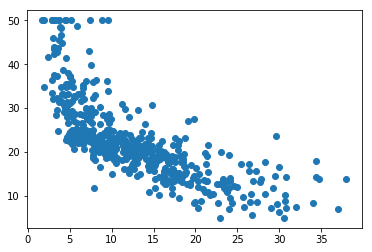

In [54]:
plt.scatter(data["lstat"], data["medv"], marker='o')
plt.show()

It seems to be an exponential function.

We apply logarithm function to it to convert it into a linear correlation and make it easier for our model to pick the correlation.

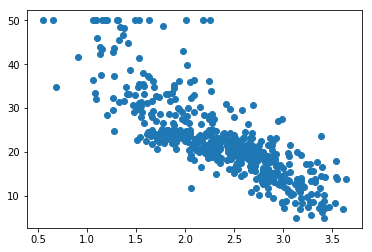

In [55]:
data_engineered=data.copy()
data_engineered["lstat"]=np.log(data_engineered["lstat"])
plt.scatter(data_engineered["lstat"], data_engineered["medv"], marker='o')
plt.show()

In [56]:
print("previous accuracy: %f" % evaluateModelOnDataset(data))
print("new accuracy: %f" % evaluateModelOnDataset(data_engineered))


previous accuracy: 0.726157
new accuracy: 0.772251


#### Apply physics functions
- Energy
- Energy rate
- Short Term Average / Long term Avg
- Kurtosis
- FFT (Fast Fourier Transform)


### Deal with too many features / too much data

- dimensionality reduction
- feature selection

#### Dimensionality reduction

- Factorisation 
    - PCA Principal Component Analysis
- ICA 
Independent Component Analysis
- t-SNE 
t-Distributed Stochastic Neighbour Embedding
- UMAP 
Uniform Manifold Approximation and Projection

#### Feature selection
Manual
- Filter out features which are highly correlated.
- Plot multi scatter chart 
- Use correlation table 
- (might need to remove features which were used for extraction)

#### Correlation Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together.

#### Feature selection
Manual
- Filter out features which are highly correlated.
- Plot multi scatter chart 
- Use correlation table 
- (might need to remove features which were used for extraction)

Programmatically
- Tree based feature selection
- Use feature importance from XGBoost or RandomForest


### Statistical Inference

- [Understanding statistical inference]() [video]
- [Four ideas of Statistical Inference](http://www.bristol.ac.uk/medical-school/media/rms/red/4_ideas_of_statistical_inference.html)
- [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) [book]
- [Statistical Inference](https://www.coursera.org/learn/statistical-inference) [course]


### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.